In [40]:
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size':14})

# Model Equations

In [11]:
def ResDyn(t,x):
    
    # Type I
    rhoS = c*np.exp(x[0])
    rhoI = c*phi*np.exp(x[1])
    
    # Type II
    # rhoS = (c*np.exp(x[0]))/(1+c*hS*np.exp(x[0])+c*phi*hI*np.exp(x[1]))
    # rhoI = (c*phi*np.exp(x[1]))/(1+c*hS*np.exp(x[0])+c*phi*hI*np.exp(x[1]))

    
    Sdot = a*(1-q*np.exp(x[0])) - rhoS*(np.exp(x[2]-x[0])+np.exp(x[3]-x[0])) - (beta*lambda_phi*np.exp(x[3]))/mu - b
    Idot = (beta*lambda_phi*np.exp(x[0]+x[3]-x[1]))/mu - (b+alpha) - rhoI*(np.exp(x[2]-x[1])+np.exp(x[3]-x[1]))
    PSdot = (theta*rhoS - rhoI - d)
    PIdot= rhoI*np.exp(x[2]-x[3]) - (d+alphaP)
    
    return[Sdot,Idot,PSdot,PIdot]


def MutDyn(t,x):
    
    # resident
    
    # Type I
    rhoS = c*np.exp(x[0])
    rhoI = c*phi*np.exp(x[1])
    
    Sdot = a*(1-q*np.exp(x[0])) - rhoS*(np.exp(x[2]-x[0])+np.exp(x[3]-x[0])) - (beta*lambda_phi*np.exp(x[3]))/mu - b
    Idot = (beta*lambda_phi*np.exp(x[0]+x[3]-x[1]))/mu - (b+alpha) - rhoI*(np.exp(x[2]-x[1])+np.exp(x[3]-x[1]))
    PSdot = (theta*rhoS - rhoI - d)
    PIdot= rhoI*np.exp(x[2]-x[3]) - (d+alphaP)
    
    # mutant
    
    # Type I
    rhoIm = c*phim*np.exp(x[4])
    
    # Type II
    # rhoIm = (c*phim*np.exp(x[4]))/(1+c*hS*np.exp(x[0])+c*phim*hI*np.exp(x[1]))
    
    Imdot = (beta*lambda_phim*np.exp(x[0]+x[5]-x[4]))/mu - (b+alpha) - rhoIm*(np.exp(x[2]-x[4])+np.exp(x[3]-x[4]))
    PImdot= rhoIm*np.exp(x[2]-x[5]) - (d+alphaP)
    
    return[Sdot,Idot,PSdot,PIdot,Imdot,PImdot]

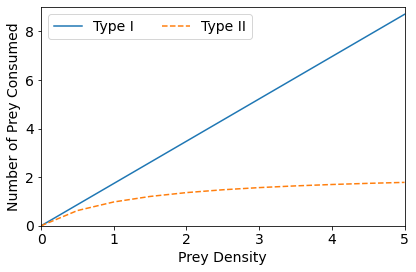

In [38]:
# Holling Type I & Type II Functional Responses

Ss = np.linspace(0,5,11)
Is = np.linspace(0,1.5,11)
c = 1.2
hs = 0.6
hi = 0.1
phi = 1.5
T1=[]
T2=[]
for i in range(len(Ss)):
    S = Ss[i]
    I = Is[i]
    T1.append(c*S+c*phi*I)
    T2.append((c*S/(1+c*hs*S+c*phi*hi*I))+(c*phi*I/(1+c*hs*S+c*phi*hi*I)))

plt.plot(Ss,T1,label='Type I')
plt.plot(Ss,T2,label='Type II',linestyle='dashed')
plt.xlabel('Prey Density')
plt.ylabel('Number of Prey Consumed')
plt.xlim(0,5)
plt.ylim(0,9)
plt.legend(frameon=True, loc='upper left', ncol=2)
plt.tight_layout()
#plt.savefig(fname='HollingResponsesSI.svg',format="svg")
plt.show()

In [12]:
# Parameter Values

a = 2
q = 0.2
c = 1.2
theta = 0.5
d = 0.4
b = 0.2
alpha = 0.8
alphaP = 0.7
mu = 0.15
beta = 0.95

# Trade-off 

curv = 0.2
grad = -0.3

# Initial Conditions 

IC=[1,1,1,1]

# Time 

tmax = 400
ts=np.linspace(0,tmax,tmax*100)
strains = 51
rnge=20000
ts2 = ts[rnge:tmax*100]

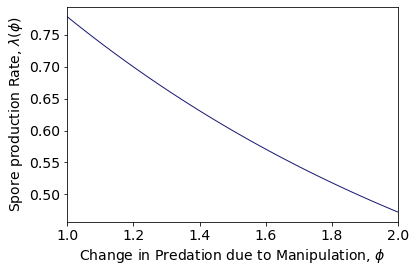

In [39]:
# Trade-off Function
phis = np.arange(1,2.01,0.01) 
lambda_phis = 0.6 - ((grad)**2/curv)*(1-np.exp((curv*(phis-1.5))/(grad)))
plt.plot(phis,lambda_phis,'midnightblue',linewidth=1)
plt.xlim(1,2)
plt.xlabel(r'Change in Predation due to Manipulation, $\phi$',fontsize=14)
plt.ylabel(r'Spore production Rate, $\lambda(\phi)$',fontsize=14)
plt.tight_layout()

#plt.savefig("trade_off_func.svg", format='svg')

# Vary Parameters

b =  0 b is  0 phi* is  1.5
Period is:  7.00017500437508


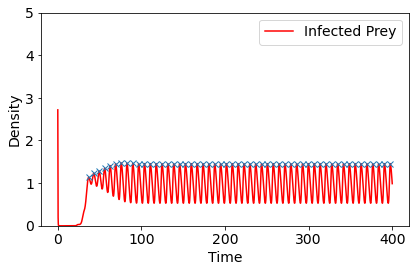

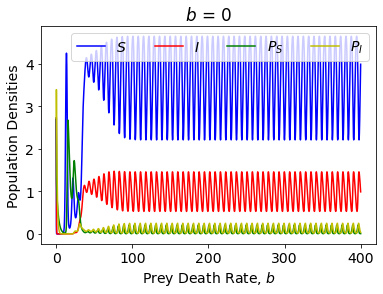

, 0.05 b is  0.05 phi* is  1.5
Period is:  6.850171254281349


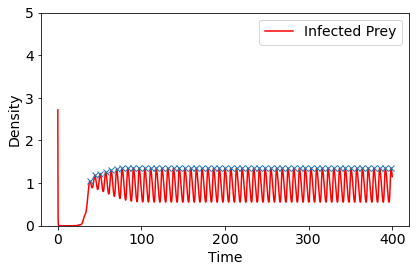

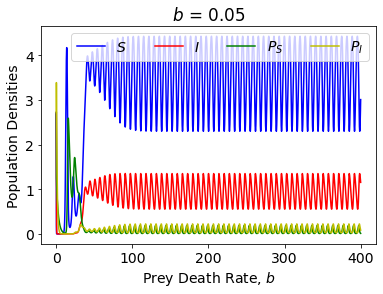

, 0.10 b is  0.1 phi* is  1.52
Period is:  6.730168254206376


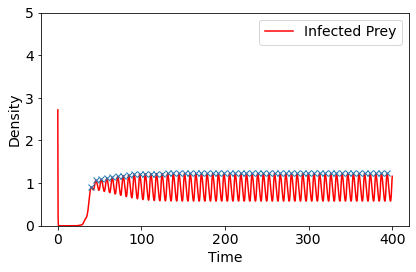

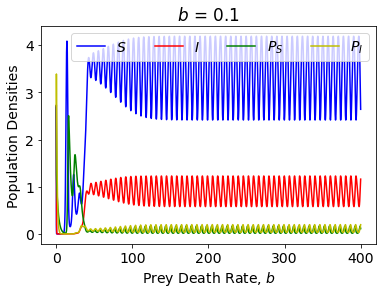

, 0.15 b is  0.15 phi* is  1.52
Period is:  6.620165504137617


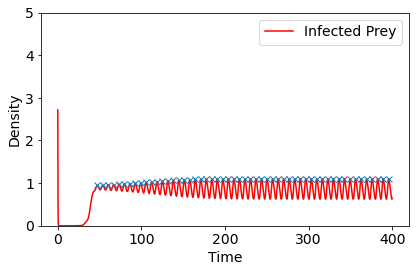

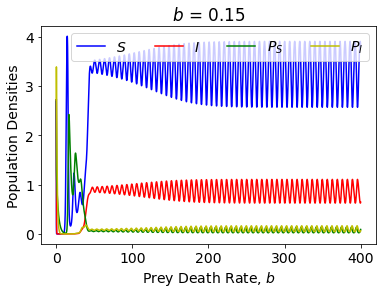

, 0.20 b is  0.2 phi* is  1.52
Period is:  1


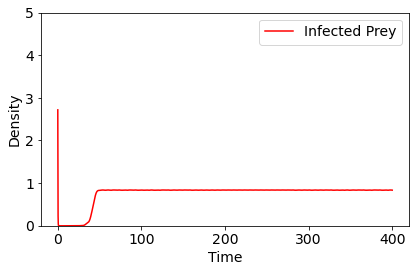

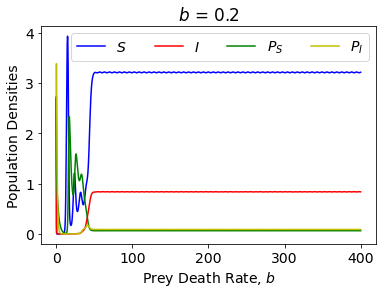

, 0.25 b is  0.25 phi* is  1.54
Period is:  6.570164254106345


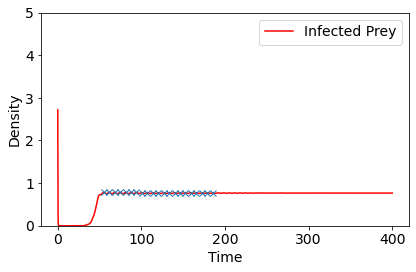

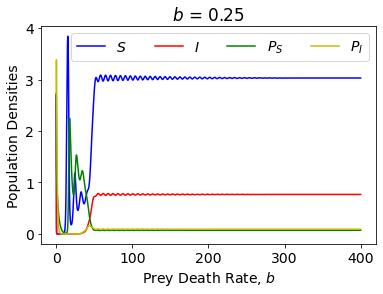

, 0.30 b is  0.3 phi* is  1.5
Period is:  6.570164254106359


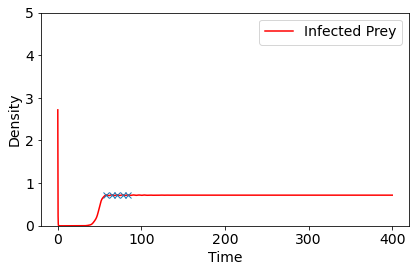

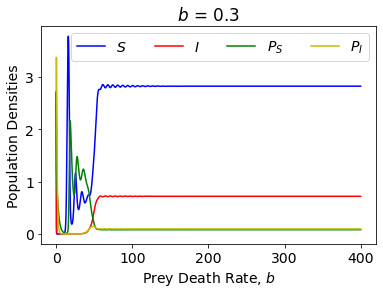

, 0.35 b is  0.35 phi* is  1.52
Period is:  1


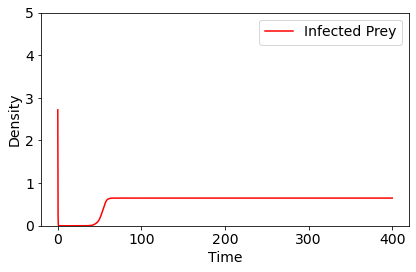

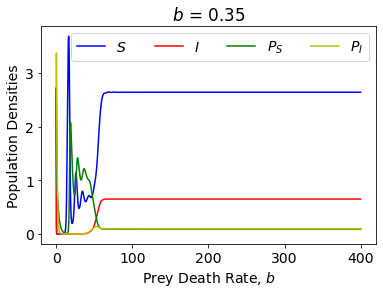

, 0.40 b is  0.4 phi* is  1.52
Period is:  1


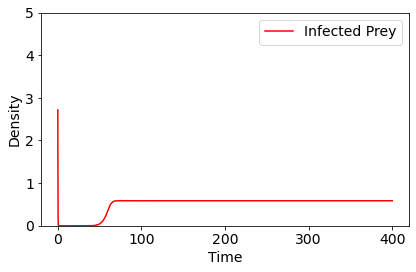

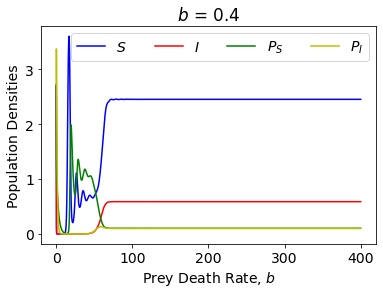

, 0.45 b is  0.45 phi* is  1.5
Period is:  1


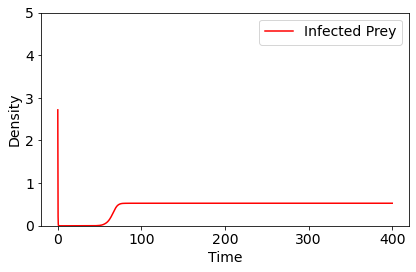

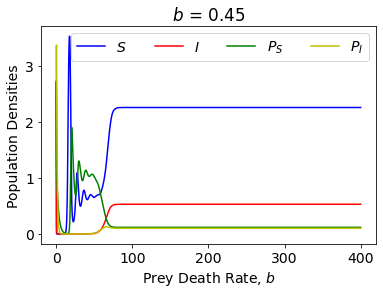

, 0.50 b is  0.5 phi* is  1.48
Period is:  1


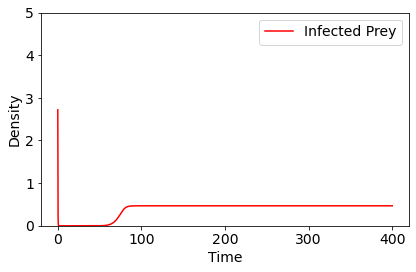

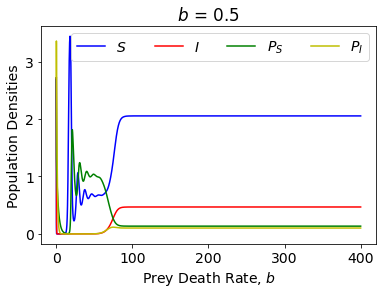

, 0.55 b is  0.55 phi* is  1.46
Period is:  1


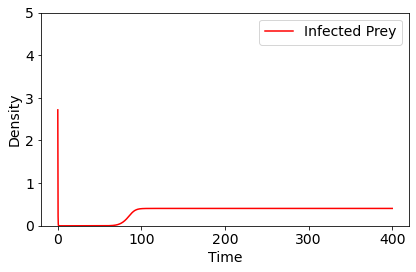

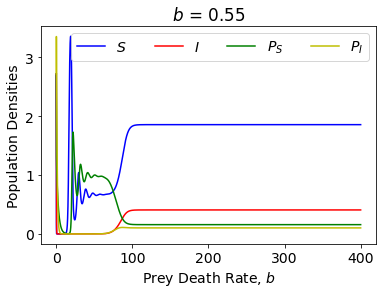

, 0.60 b is  0.6 phi* is  1.44
Period is:  1


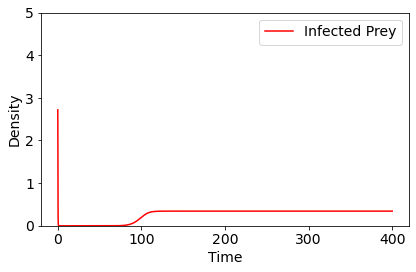

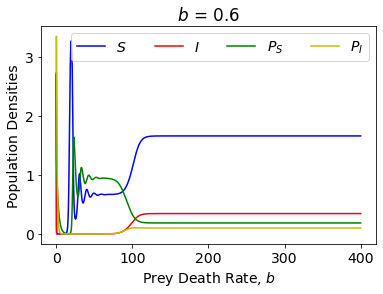

, 0.65 b is  0.65 phi* is  1.42
Period is:  1


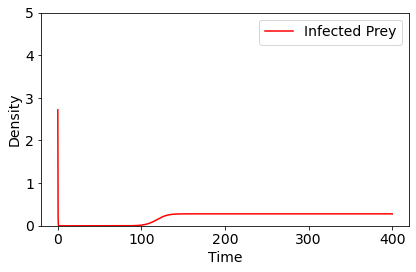

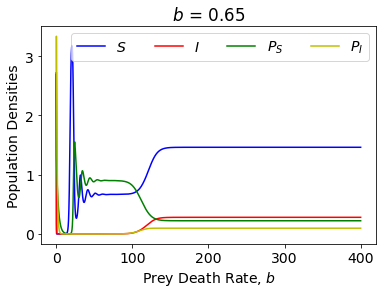

, 0.70 b is  0.7 phi* is  1.38
Period is:  1


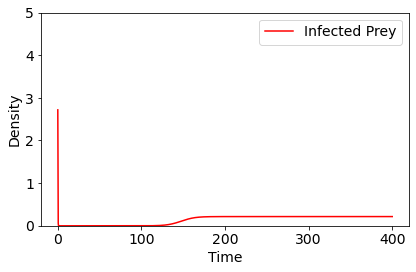

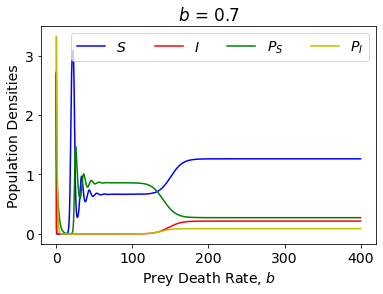

In [28]:
# Varying prey death rate here
bs = (0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7)

# Empty Arrays 

# CSS values of phi
cssstoreb=[]

# Average host densities 
Sbav=[]
Ibav=[]
PSbav=[]
PIbav=[]

# Min & Max host densities
Sbmin=[]
Sbmax=[]
Ibmin=[]
Ibmax=[]
PSbmin=[]
PSbmax=[]
PIbmin=[]
PIbmax=[]

for z in range(len(bs)):
    b=bs[z]
    if z==0:
        print("b = ", b, end=" ")
    else:
        print(", %.2f" %(b), end=" ")
        
    for res in range(strains):
        phi=1+(1/(strains-1))*res
        lambda_phi = 0.6 - ((grad)**2/curv)*(1-np.exp((curv*(phi-1.5))/(grad)))
        
        solr=solve_ivp(ResDyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
        
        # Peaks require minimum height of 0.2 to be identified as a peak
        peaks,_=find_peaks(np.exp(solr.y[1]),height=0.2)
        promin = peak_prominences(np.exp(solr.y[1]), peaks)
        new_promin=[]
        # We ensure peaks have a distance greater than 0.01 time steps between them to be identified as a peak
        for m in range(len(promin[0])):
            if promin[0][m] > 0.01:
                new_promin.append(peaks[m])       
        pp = np.array(new_promin)
        # We have an array of peaks. If there are 1 or less peaks then we have equilbirum dynamics 
        # Otherwise the time between the last two peaks of the array is taken as the period of the resident dynamics
        if len(pp)<=1 or ts[pp[-1]]-ts[pp[-2]]<1:
            period=1
        else:
            period=ts[pp[-1]]-ts[pp[-2]]
        
        # Adding this loop for when there are no peaks i.e. dynamics are at equilibrium 
        if len(pp) <= 1:
            tr = 25000
        else:
            tr = pp[-1]

        # Setting up initial coniditons so we can run mutant dyanmics
        ICm1=[solr.y[0,tr],solr.y[1,tr],solr.y[2,tr],solr.y[3,tr],-0.0001,-100]
        ICm2=[solr.y[0,tr],solr.y[1,tr],solr.y[2,tr],solr.y[3,tr],-100,-0.0001]
        
        # Now we run the mutant dynamics for one cycle 
        tm=np.linspace(0,period,101)
        phim=phi+0.05
        lambda_phim = 0.6 - ((grad)**2/curv)*(1-np.exp((curv*(phim-1.5))/(grad)))
        solm1=solve_ivp(MutDyn,[tm[0],tm[-1]],ICm1,method='Radau')
        solm2=solve_ivp(MutDyn,[tm[0],tm[-1]],ICm2,method='Radau')
        # Create a matrix C of mutant densities 
        C=[[np.exp(solm1.y[4,-1]),np.exp(solm1.y[5,-1])],[np.exp(solm2.y[4,-1]),np.exp(solm2.y[5,-1])]]
        # Find the eigenvalues of this matrix C
        eigs=np.linalg.eig(C)
        # The largest of these eigenvalues can be taken as the mutant invasion fitness 
        # When this fitness first turns negative we record the last value of phi as the singular strategy 
        if(np.log(max(eigs[0])))<0:
            cssstoreb.append(phi)
            print("b is ",b,"phi* is ",phi)
            print("Period is: ",period)
            
            S=np.exp(solr.y[0])
            I=np.exp(solr.y[1])
            PS=np.exp(solr.y[2])
            PI=np.exp(solr.y[3])
            
            # Allowing dynamics to settle to long term behaviour (cycles or equilbirum) before taking average,
            # min & max host densities 
            Sbmin.append(min(S[rnge:tmax*100]))
            Ibmin.append(min(I[rnge:tmax*100]))
            PSbmin.append(min(PS[rnge:tmax*100]))
            PIbmin.append(min(PI[rnge:tmax*100]))

            Sbmax.append(max(S[rnge:tmax*100]))
            Ibmax.append(max(I[rnge:tmax*100]))
            PSbmax.append(max(PS[rnge:tmax*100]))
            PIbmax.append(max(PI[rnge:tmax*100]))

            Sbav.append(sum(S[rnge:tmax*100])/len(S[rnge:tmax*100]))
            Ibav.append(sum(I[rnge:tmax*100])/len(I[rnge:tmax*100]))
            PSbav.append(sum(PS[rnge:tmax*100])/len(PS[rnge:tmax*100]))
            PIbav.append(sum(PI[rnge:tmax*100])/len(PI[rnge:tmax*100]))
            
            # Infected prey population dynamics & the location of the peaks
            plt.plot(ts,np.exp(solr.y[1]),color='r',label='Infected Prey')
            plt.legend()
            plt.xlabel('Time')
            plt.ylabel('Density')
            if len(pp)>0:
                peakcheck=np.exp(solr.y[1])
                plt.plot(ts[pp], (peakcheck[pp]), "x")
            plt.ylim(0,5)
            plt.tight_layout()
            plt.show()
            
            # Population dynamics of all host classes
            plt.plot(solr.t,np.exp(solr.y[0]),color='b',label=r'$S$')
            plt.plot(solr.t,np.exp(solr.y[1]),color='r',label=r'$I$')
            plt.plot(solr.t,np.exp(solr.y[2]),color='g',label=r'$P_S$')
            plt.plot(solr.t,np.exp(solr.y[3]),color='y',label=r'$P_I$')
            plt.xlabel(r'Prey Death Rate, $b$')
            plt.ylabel(r'Population Densities')
            plt.title(r'$b$ = '+str(b)+'')
            plt.legend(frameon=True, loc='upper right', ncol=4)
            plt.show()
            break

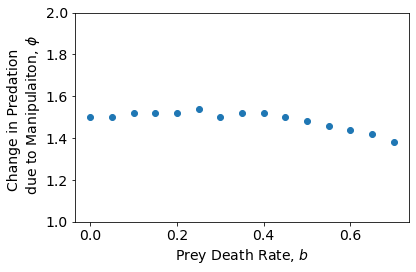

In [29]:
# Here you can see the CSS points
plt.scatter(bs,cssstoreb)
plt.ylim(1,2)
plt.xlabel('Prey Death Rate, $b$')
plt.ylabel('Change in Predation \n due to Manipulaiton, $\\phi$')
plt.tight_layout()

In [46]:
# Parameter Values

a = 2
q = 0.2
c = 1.2
theta = 0.5
d = 0.4
b = 0.2
alpha = 0.8
alphaP = 0.7
mu = 0.15
beta = 0.95

# Initial Conditions 

IC=[1,1,1,1]

In [48]:
# empty array to record period of population dynamics 
solstoreb=[]
strains = 201

for z in range(len(bs)):
    b=bs[z]
    if z==0:
        print("b = ", b, end=" ")
    else:
        print(", %.2f" %(b), end=" ")
    
    for res in range(strains):
        phi=1+(1/(strains-1))*res
        lambda_phi = 0.6 - ((grad)**2/curv)*(1-np.exp((curv*(phi-1.5))/(grad)))
        solr=solve_ivp(ResDyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
        
        Is = np.exp(solr.y[1])[rnge:tmax*100]
        peaks,_=find_peaks(Is,height=0.2)
        
        promin = peak_prominences(Is, peaks)
        new_promin=[]
        for m in range(len(promin[0])):
            if promin[0][m] > 0.01:
                new_promin.append(peaks[m])
        pp = np.array(new_promin)
        
        if len(pp)<=1 or ts[pp[-1]]-ts[pp[-2]]<1:
            period=1
        else:
            period=ts[pp[-1]]-ts[pp[-2]]
            
        solstoreb.append(period)

# When cycles get too large we wish to record them as at equilbirum 
# 20 is appropiate here because the period never exceeds this value
for i in range(len(bs)*strains):
    if solstoreb[i]>20:
        solstoreb[i]=1

b =  0 , 0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30 , 0.35 

<ipython-input-11-0bbbb001076b>:5: RuntimeWarning: overflow encountered in exp
  rhoI = c*phi*np.exp(x[1])
<ipython-input-11-0bbbb001076b>:13: RuntimeWarning: invalid value encountered in double_scalars
  Idot = (beta*lambda_phi*np.exp(x[0]+x[3]-x[1]))/mu - (b+alpha) - rhoI*(np.exp(x[2]-x[1])+np.exp(x[3]-x[1]))


, 0.40 , 0.45 , 0.50 , 0.55 , 0.60 , 0.65 , 0.70 

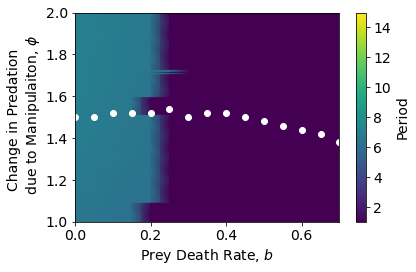

In [49]:
beta=np.linspace(1,2,strains)
plt.pcolormesh(bs,beta,np.array(solstoreb).reshape(len(bs),strains).transpose(),shading='gouraud',rasterized=True)
plt.colorbar(label='Period')
plt.clim(1,15)
plt.scatter(bs,cssstoreb,color='white')

plt.xlabel('Prey Death Rate, $b$')
plt.ylabel('Change in Predation \n due to Manipulaiton, $\\phi$')
plt.tight_layout()
#plt.savefig(fname="bcont.svg",format="svg")

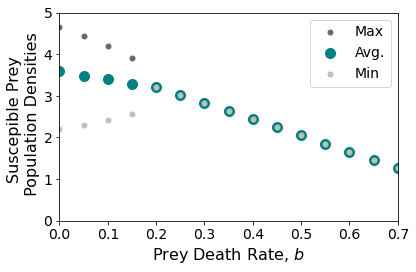

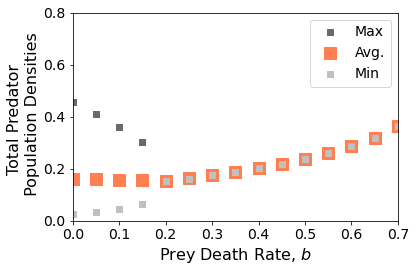

In [30]:
# Susceptible Prey 
plt.scatter(bs,Sbmax,marker='.',s=100,color='dimgrey',label='Max',rasterized=True)
plt.scatter(bs,Sbav,marker='.',s=400,color='teal',label='Avg.',rasterized=True)
plt.scatter(bs,Sbmin,marker='.',s=100,color='silver',label='Min',rasterized=True)
plt.legend()
plt.xlabel('Prey Death Rate, $b$',fontsize=16)
plt.ylabel('Suscepible Prey \n Population Densities',fontsize=16)
plt.xlim(0,0.7)
plt.ylim(0,5)
plt.tight_layout()
#plt.savefig(fname="bS.svg",format="svg")
plt.show()


# Total Predator Population 
predbav=[]
predbmin=[]
predbmax=[]
for l in range(len(PSbav)):
    predbav.append(PSbav[l]+PIbav[l])
    predbmin.append(PSbmin[l]+PIbmin[l])
    predbmax.append(PSbmax[l]+PIbmax[l])
    
plt.scatter(bs,predbmax,marker=',',s=30,color='dimgrey',label='Max',rasterized=True)
plt.scatter(bs,predbav,marker=',',s=150,color='coral',label='Avg.',rasterized=True)
plt.scatter(bs,predbmin,marker=',',s=30,color='silver',label='Min',rasterized=True)
plt.legend()
plt.xlabel('Prey Death Rate, $b$',fontsize=16)
plt.ylabel('Total Predator \n Population Densities',fontsize=16)
plt.xlim(0,0.7)
plt.ylim(0,0.8)
plt.tight_layout()
#plt.savefig(fname="bpred.svg",format="svg")
plt.show()

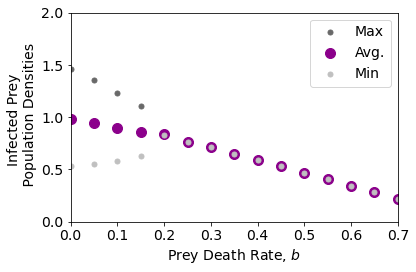

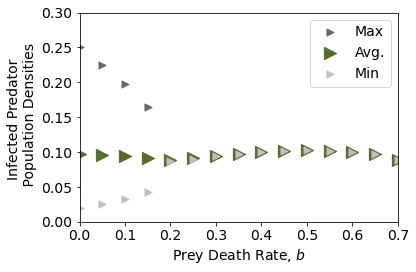

In [32]:
# Infection Dynamics 
# Infected Prey 

plt.scatter(bs,Ibmax,marker='.',s=100,color='dimgrey',label='Max',rasterized=True)
plt.scatter(bs,Ibav,marker='.',s=400,color='darkmagenta',label='Avg.',rasterized=True)
plt.scatter(bs,Ibmin,marker='.',s=100,color='silver',label='Min',rasterized=True)
plt.xlim([0, 0.7])
plt.xlabel('Prey Death Rate, $b$')
plt.ylabel('Infected Prey \n Population Densities')
plt.ylim([0, 2])
plt.legend()
plt.tight_layout()
plt.show()


# Infected Predators

plt.scatter(bs,PIbmax,marker='>',s=50,color='dimgrey',label='Max',rasterized=True)
plt.scatter(bs,PIbav,marker='>',s=150,color='darkolivegreen',label='Avg.',rasterized=True)
plt.scatter(bs,PIbmin,marker='>',s=50,color='silver',label='Min',rasterized=True)
plt.xlim([0, 0.7])
plt.xlabel('Prey Death Rate, $b$')
plt.ylabel('Infected Predator \n Population Densities')
plt.ylim([0, 0.3])
plt.legend()
plt.tight_layout()
plt.show()

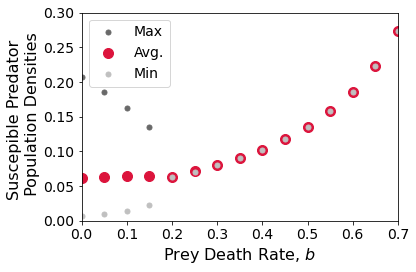

In [36]:
# Susceptible Predators 

plt.scatter(bs,PSbmax,marker='.',s=100,color='dimgrey',label='Max',rasterized=True)
plt.scatter(bs,PSbav,marker='.',s=400,color='crimson',label='Avg.',rasterized=True)
plt.scatter(bs,PSbmin,marker='.',s=100,color='silver',label='Min',rasterized=True)
plt.legend()
plt.xlabel('Prey Death Rate, $b$',fontsize=16)
plt.ylabel('Suscepible Predator \n Population Densities',fontsize=16)
plt.xlim(0,0.7)
plt.ylim(0,0.3)
plt.tight_layout()
#plt.savefig(fname="bPS.svg",format="svg")
plt.show()

<ipython-input-55-0861353b4f75>:13: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(1,15)


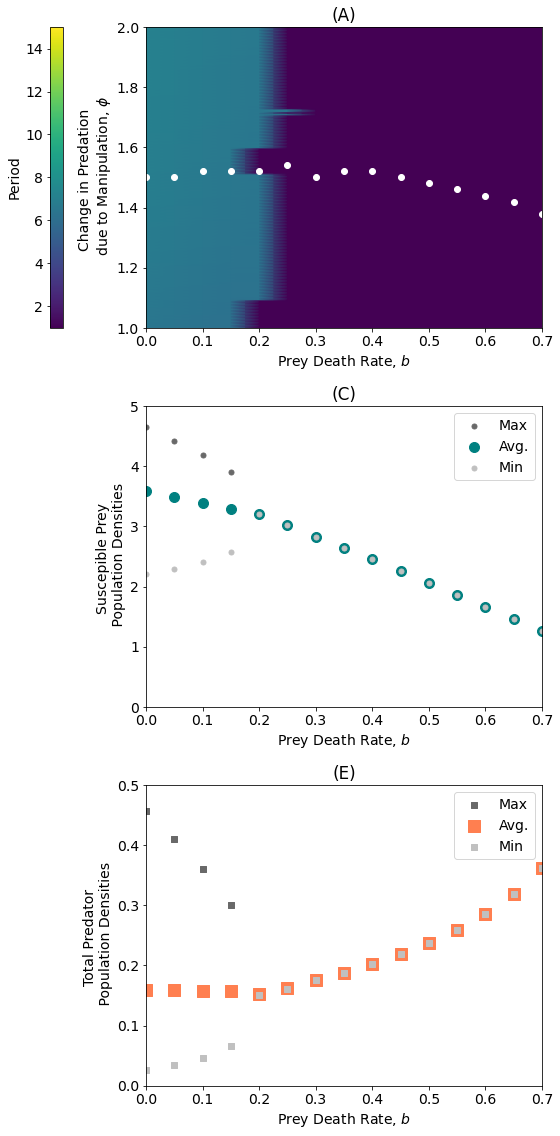

In [55]:
fig, ((ax12,ax1),(ax34,ax3),(ax56,ax5)) = plt.subplots(nrows=3, ncols=2, figsize=(8,16),gridspec_kw={'width_ratios': [0.1,3]})
ax34.axis('off')
ax56.axis('off')

pcm = ax1.pcolormesh(bs,beta,np.array(solstoreb).reshape(len(bs),strains).transpose(),shading='gouraud',vmin=1, vmax=15,rasterized=True)
ax1.scatter(bs,cssstoreb,color='white',rasterized=True)
ax1.set_title('(A)')
ax1.set_xlim([0, 0.7])
ax1.set_ylabel('Change in Predation \n due to Manipulation, $\\phi$')
ax1.set_xlabel('Prey Death Rate, $b$')

cbar = fig.colorbar(pcm ,ax12)
cbar.set_clim(1,15)
ax12.yaxis.tick_left()
ax12.yaxis.set_label_position("left")
ax12.set_ylabel('Period')

ax3.scatter(bs,Sbmax,marker='.',s=100,color='dimgrey',label='Max',rasterized=True)
ax3.scatter(bs,Sbav,marker='.',s=400,color='teal',label='Avg.',rasterized=True)
ax3.scatter(bs,Sbmin,marker='.',s=100,color='silver',label='Min',rasterized=True)
ax3.set_title('(B)')
ax3.set_xlim([0, 0.7])
ax3.set_xlabel('Prey Death Rate, $b$')
ax3.set_ylabel('Suscepible Prey \n Population Densities')
ax3.set_ylim([0, 5])
ax3.legend()

ax5.scatter(bs,predbmax,marker=',',s=30,color='dimgrey',label='Max',rasterized=True)
ax5.scatter(bs,predbav,marker=',',s=150,color='coral',label='Avg.',rasterized=True)
ax5.scatter(bs,predbmin,marker=',',s=30,color='silver',label='Min',rasterized=True)
ax5.set_title('(C)')
ax5.set_xlim([0, 0.7])
ax5.set_xlabel('Prey Death Rate, $b$')
ax5.set_ylabel('Total Predator \n Population Densities')
ax5.set_ylim([0, 0.5])
ax5.legend()

fig.subplots_adjust(wspace=0.3,hspace=0.4)

plt.tight_layout()

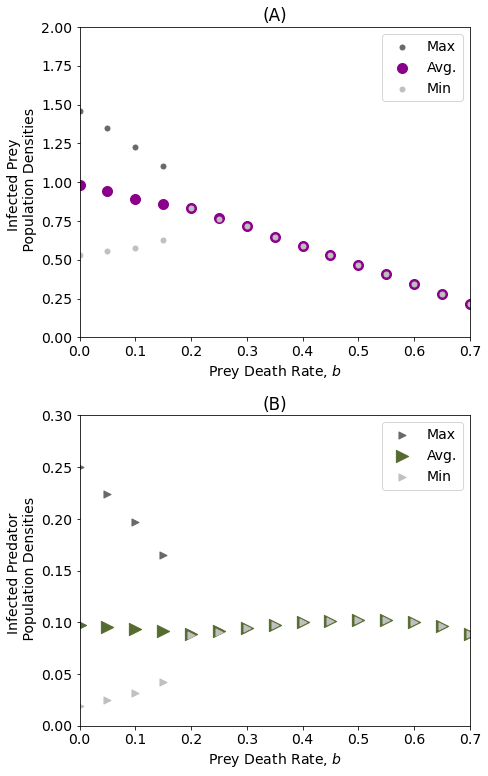

In [64]:
fig, ((ax3),(ax5)) = plt.subplots(nrows=2, ncols=1, figsize=(7,11),gridspec_kw={'width_ratios': [6]})

ax3.scatter(bs,Ibmax,marker='.',s=100,color='dimgrey',label='Max',rasterized=True)
ax3.scatter(bs,Ibav,marker='.',s=400,color='darkmagenta',label='Avg.',rasterized=True)
ax3.scatter(bs,Ibmin,marker='.',s=100,color='silver',label='Min',rasterized=True)
ax3.set_title('(A)')
ax3.set_xlim([0, 0.7])
ax3.set_xlabel('Prey Death Rate, $b$')
ax3.set_ylabel('Infected Prey \n Population Densities')
ax3.set_ylim([0, 2])
ax3.legend()

ax5.scatter(bs,PIbmax,marker='>',s=50,color='dimgrey',label='Max',rasterized=True)
ax5.scatter(bs,PIbav,marker='>',s=150,color='darkolivegreen',label='Avg.',rasterized=True)
ax5.scatter(bs,PIbmin,marker='>',s=50,color='silver',label='Min',rasterized=True)
ax5.set_title('(B)')
ax5.set_xlim([0, 0.7])
ax5.set_xlabel('Prey Death Rate, $b$')
ax5.set_ylabel('Infected Predator \n Population Densities')
ax5.set_ylim([0, 0.3])
ax5.legend()

fig.subplots_adjust(wspace=0.3,hspace=0.4)

plt.tight_layout()